In [2]:
!pip install seaborn



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
df = pd.read_csv('/train.csv')


In [11]:
print("Первые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nПропущенные значения в каждом столбце:")
print(df.isnull().sum())
print("\nОписательная статистика для числовых переменных:")
print(df.describe())


Первые 5 строк:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 'Cabin' имеет много пропущенных значений, поэтому создадим новый признак 'HasCabin' (1 - есть, 0 - нет)
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# Проверка, что пропуски заполнены
print("\nПропущенные значения после заполнения:")
print(df.isnull().sum())



Пропущенные значения после заполнения:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64


<ipython-input-12-05647018a0e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-12-05647018a0e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

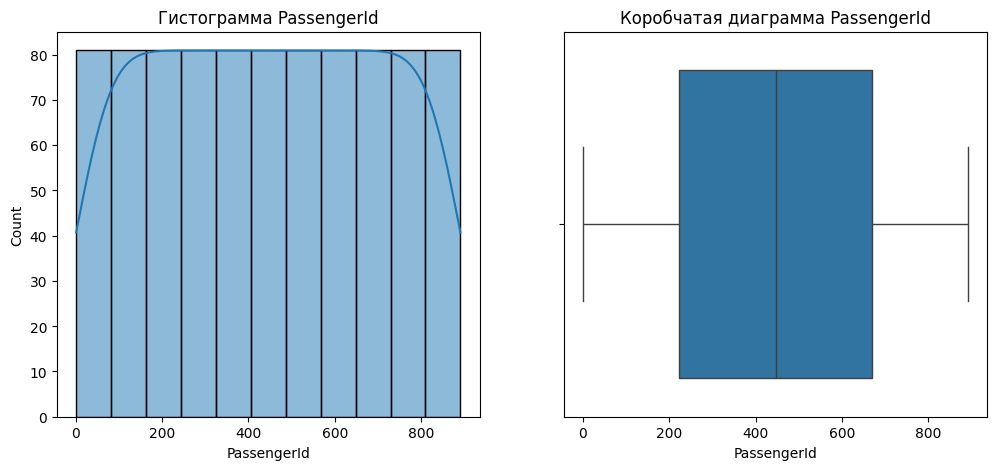

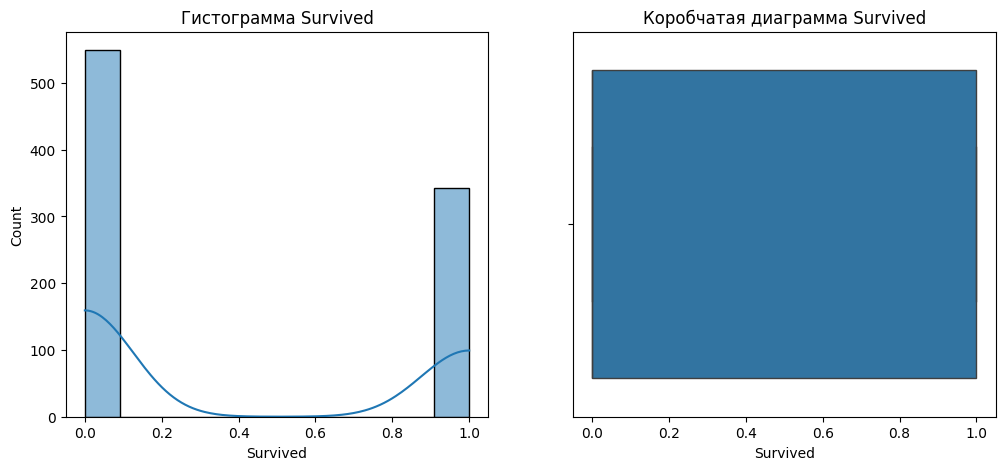

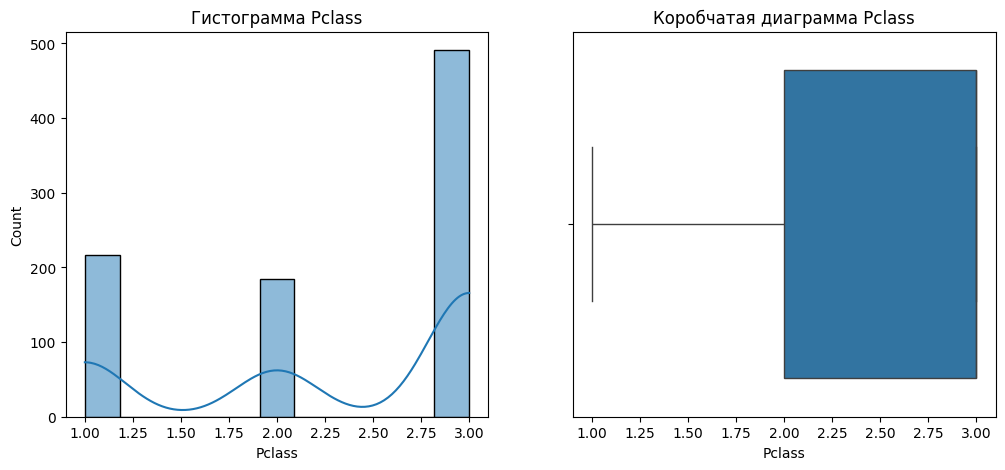

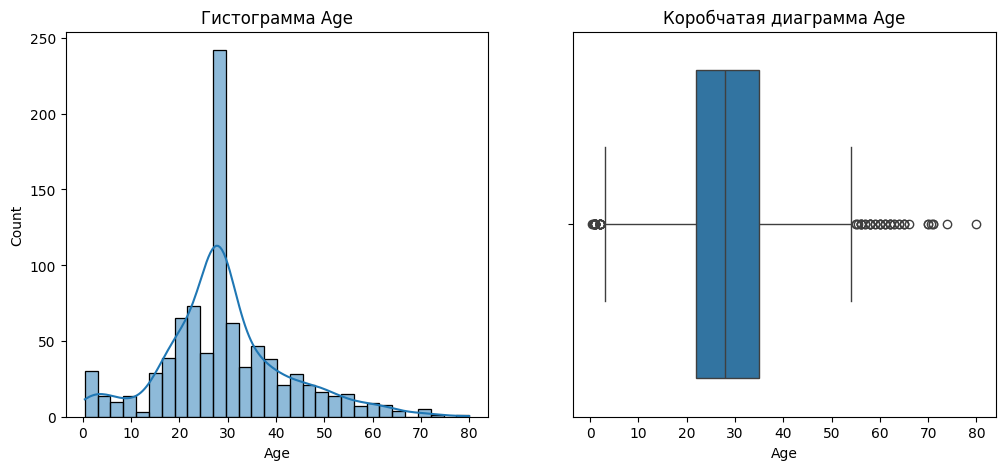

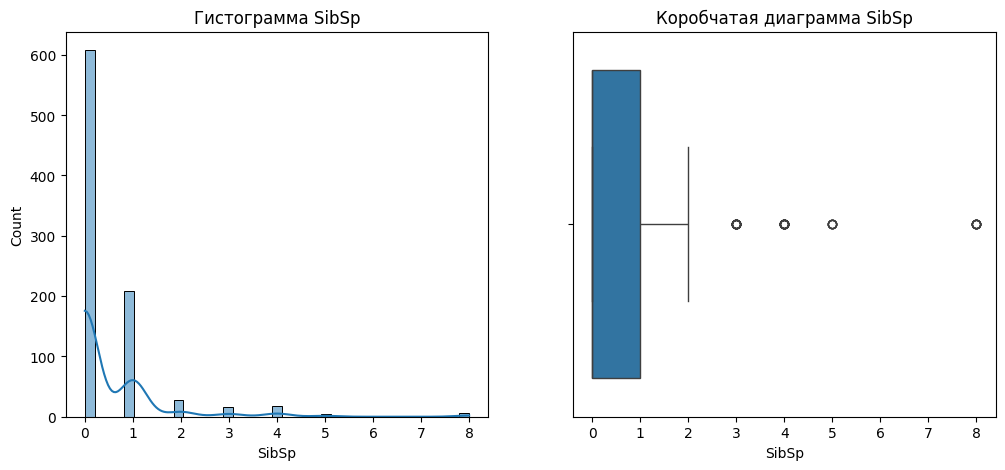

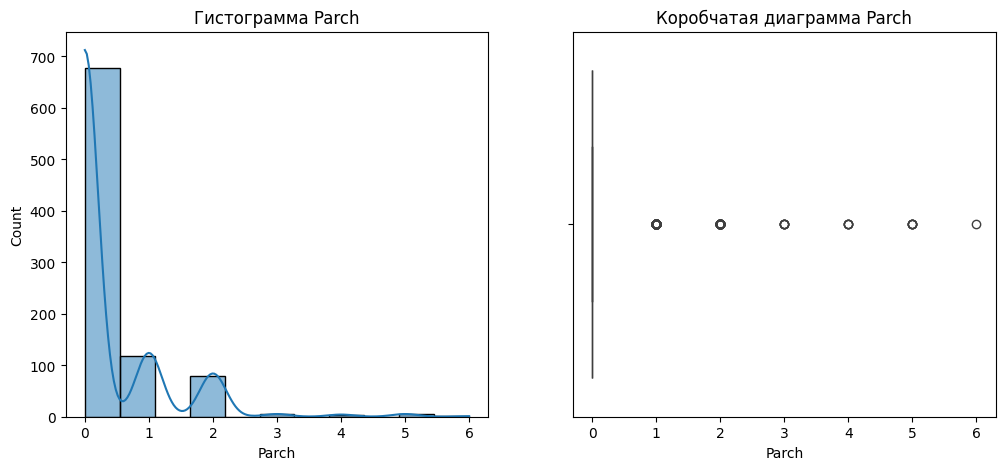

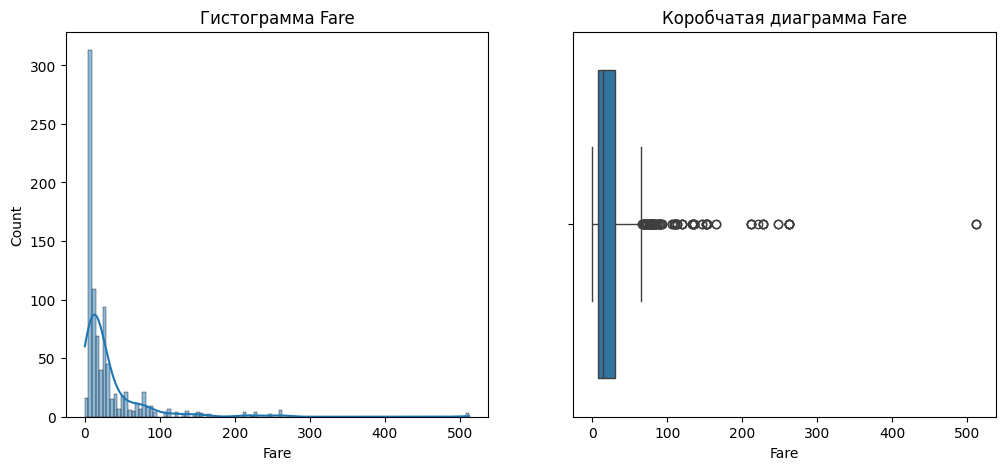

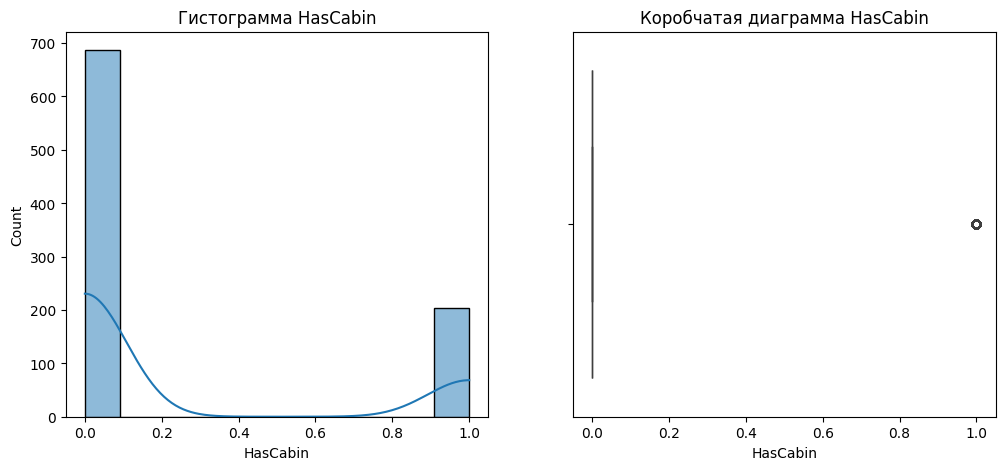

In [13]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Гистограмма {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Коробчатая диаграмма {column}')

    plt.show()

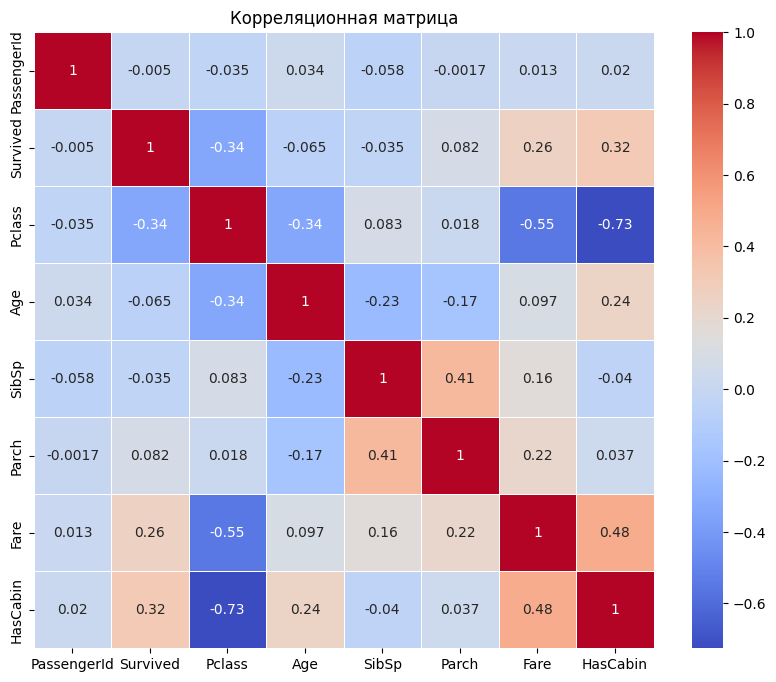

In [15]:
# Оставляем только числовые столбцы для расчета корреляционной матрицы
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()


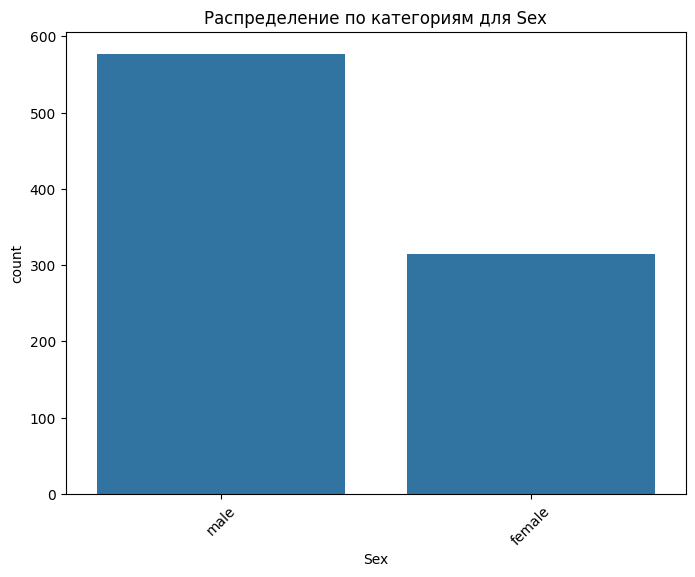

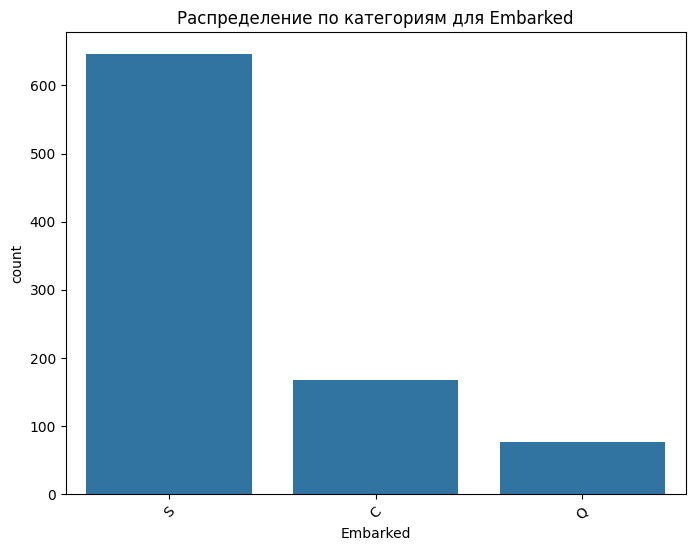

In [17]:
# Исключаем столбцы с большим количеством уникальных значений
categorical_columns = [col for col in categorical_columns if df[col].nunique() < 10]

# Визуализация распределения для оставшихся категориальных переменных
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Распределение по категориям для {column}')
    plt.xticks(rotation=45)
    plt.show()


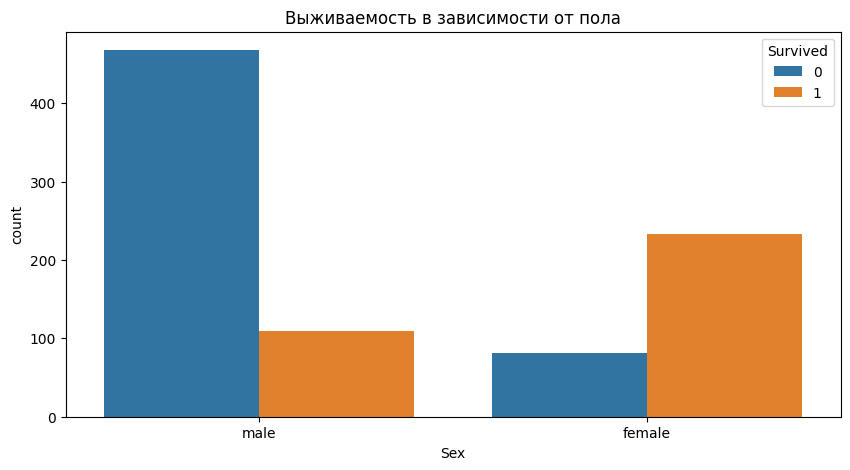

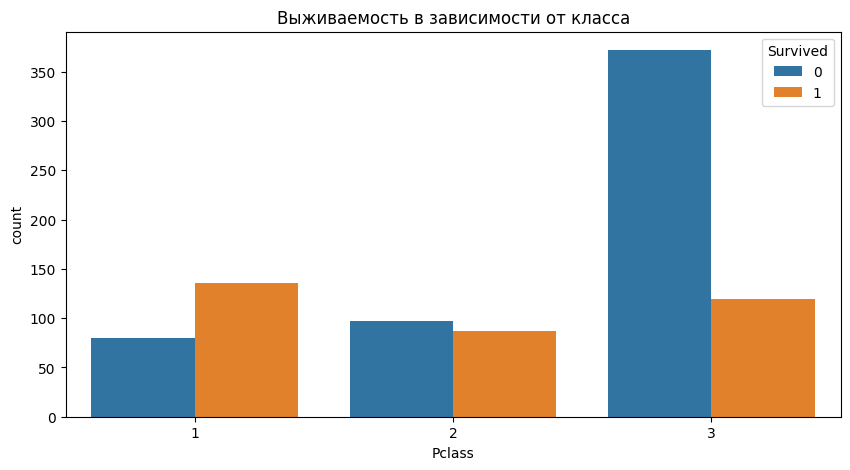

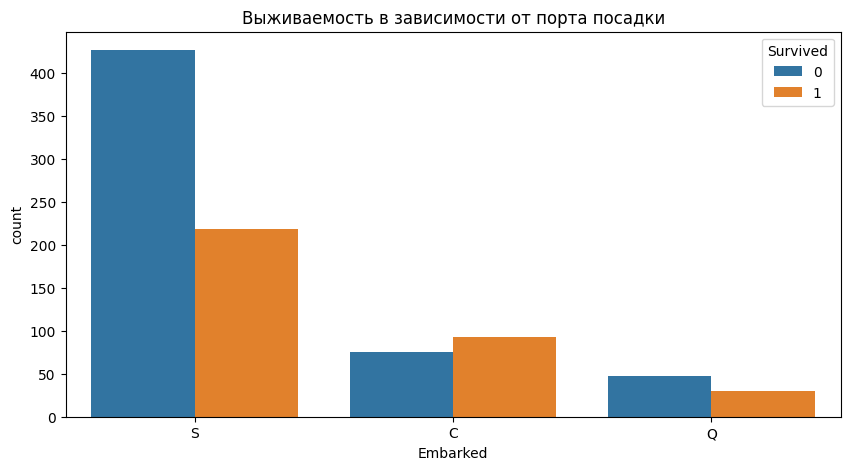

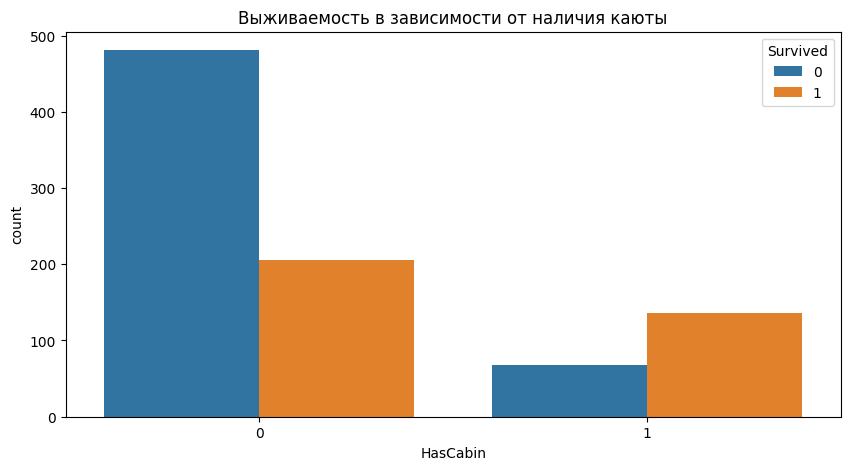

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Выживаемость в зависимости от пола')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Выживаемость в зависимости от класса')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Выживаемость в зависимости от порта посадки')
plt.show()

# 3.5 Диаграмма распределения по новым признакам
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='HasCabin', hue='Survived')
plt.title('Выживаемость в зависимости от наличия каюты')
plt.show()